In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [124]:
file_path = "data/UV7581-XLS-ENG(Exhibit 1 -- Data).csv"
data = pd.read_csv(file_path, delimiter=';')
data = data.iloc[:-3, ].set_index('ID')
data

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
ID,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,14/01/2011,14/01/2011,30/08/2010,...,K,Elementary,K->Elementary,H,1.0,"0,06364617","0,936507937",4.0,L,1.0
2,HC,8.0,8.0,AZ,0.0,7.0,A,14/01/2011,21/01/2011,15/11/2009,...,Middle,Middle,Middle->Middle,H,1.0,"0,025882353","0,88",3.0,L,1.0
3,HD,8.0,8.0,FL,0.0,3.0,A,15/01/2011,17/01/2011,15/10/2010,...,Middle,Middle,Middle->Middle,H,1.0,"0,02513089","0,888888889",3.0,L,1.0
4,HN,9.0,12.0,VA,1.0,3.0,B,15/01/2011,17/01/2011,07/01/2011,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1,0.0,NaN,0.0
5,HD,6.0,8.0,FL,0.0,6.0,T,16/01/2011,21/01/2011,30/09/2010,...,Middle,Middle,Middle->Middle,H,0.0,"0,1125","0,91011236",8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,HC,7.0,8.0,CA,0.0,5.0,A,28/06/2011,02/07/2011,15/12/2010,...,Middle,Middle,Middle->Middle,H,0.0,"0,018980477","0,921052632",3.0,L,0.0
2386,HD,8.0,8.0,CA,0.0,5.0,A,29/06/2011,03/07/2011,15/10/2010,...,K,Middle,K->Middle,H,1.0,"0,034782609","0,909090909",2.0,S-M,1.0
2387,HD,10.0,12.0,CA,0.0,6.0,A,29/06/2011,05/07/2011,18/01/2011,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,"0,882352941",4.0,NaN,1.0


In [125]:
print(data.shape)
print(data.describe())
print(data.info())

(2389, 55)
        From.Grade     To.Grade  Is.Non.Annual.         Days      Tuition  \
count  2262.000000  2239.000000     2389.000000  2389.000000  2389.000000   
mean      7.268347     7.912908        0.154039     4.575136  1615.217664   
std       1.388350     1.558226        0.361062     1.432128   645.096047   
min       3.000000     3.000000        0.000000     1.000000    79.000000   
25%       7.000000     8.000000        0.000000     4.000000  1174.000000   
50%       8.000000     8.000000        0.000000     5.000000  1700.000000   
75%       8.000000     8.000000        0.000000     5.000000  2048.000000   
max      12.000000    12.000000        1.000000    12.000000  4200.000000   

        FRP.Active  FRP.Cancelled  Cancelled.Pax  Total.Discount.Pax  \
count  2389.000000    2389.000000    2389.000000         2389.000000   
mean     16.867727       3.305567       4.807451            2.953537   
std      16.942782       3.677022       4.661194            2.876422   
min    

In [126]:
missing_values = data.isnull().sum()
print(missing_values)

Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag                  0
MDR.Low.Grade            

In [127]:
date_columns = ['Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL',
                'Latest.RPL', 'Initial.System.Date', 'FirstMeeting', 'LastMeeting']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], dayfirst=True, errors='coerce')


data['Trip.Duration'] = (data['Return.Date']-data['Departure.Date']).dt.days

data['Deposit.Advance.Days'] = (data['Departure.Date']-data['Deposit.Date']).dt.days

data['Time.Between.RPL'] = (data['Latest.RPL'] - data['Early.RPL']).dt.days
data['Days.After.Last.RPL'] = (data['Departure.Date'] - data['Latest.RPL']).dt.days

data['Deal.Days.Before'] = (data['Departure.Date'] - data['Initial.System.Date']).dt.days

data['Days.Between.FLMeetings'] = (data['LastMeeting']-data['FirstMeeting']).dt.days

data['Grade_Range'] = data['To.Grade'] - data['From.Grade']
data['Grade_Range'].fillna(data['Grade_Range'].median(), inplace=True)

data['Total.School.Enrollment'] = data.groupby('Region')['Total.School.Enrollment'].transform(lambda x: x.fillna(x.mean()))
data['FPP.to.School.enrollment'] = data['FPP'] / data['Total.School.Enrollment']

data.drop(columns=['Deposit.Date', 'Departure.Date'], inplace=True)
data.drop(columns=['Return.Date', 'Days'], inplace=True)
data.drop(columns=['Initial.System.Date'], inplace=True)
data.drop(columns=['Early.RPL', 'Latest.RPL'], inplace=True)
data.drop(columns=['FirstMeeting', 'LastMeeting'], inplace=True)
data.drop(columns=['From.Grade', 'To.Grade'], inplace=True)


C:\Users\rsast\AppData\Local\Temp\ipykernel_500\1517766576.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Grade_Range'].fillna(data['Grade_Range'].median(), inplace=True)


In [128]:
poverty_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':0}
income_levels = [chr(i) for i in range(ord('A'), ord('Q')+1)]
income_mapping = {level: idx+1 for idx, level in enumerate(income_levels)}
income_mapping['Z'] = 0

data['Income.Level'] = data['Income.Level'].map(income_mapping)
data['Poverty.Code'] = data['Poverty.Code'].map(poverty_mapping)

In [129]:
def categorize_state(state):
    state = state.strip().upper()
    if state in ['ME','VT','NH','MA','CT','RI','NY','PA','NJ']:
        return 'NorthEast'
    elif state in ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH']:
        return 'MidWest'
    elif state in ['DE','FL','SC','NC','TN','KY','WV','VA','MD','TX','LA','OK','AR','MS','AL','GA']:
        return 'South'
    elif state in ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']:
        return 'West'
    else:
        return 'Other'

data['Group.State'] = data['Group.State'].apply(categorize_state)
print(data['Group.State'])

data = pd.get_dummies(data, columns=['Travel.Type'], prefix='Travel.Type.', drop_first=True)
data = pd.get_dummies(data, columns=['Group.State'], prefix='OriginState.', drop_first=True)
data = pd.get_dummies(data, columns=['School.Type'], prefix='School.Type.', drop_first=True)
data = pd.get_dummies(data, columns=['SPR.New.Existing'], prefix='SPR.', drop_first=True)
data = pd.get_dummies(data, columns=['MajorProgramCode'], prefix='ProgramCode.', drop_first=True)
data = pd.get_dummies(data, columns=['SchoolSizeIndicator'], prefix='SchoolSize', drop_first=True)



ID
1        West
2        West
3       South
4       South
5       South
        ...  
2385     West
2386     West
2387     West
2388     West
2389     West
Name: Group.State, Length: 2389, dtype: object


In [130]:
missing_values = data.isnull().sum()
print(missing_values)

threshold = 0.3
cols_to_drop = missing_values[missing_values>threshold * data.shape[0]].index
data.drop(columns=cols_to_drop, inplace=True) # drop all features with more than 30% of entries missing

print(data.info())

Program.Code         0
Is.Non.Annual.       0
Special.Pay       1919
Tuition              0
FRP.Active           0
                  ... 
ProgramCode._I       0
ProgramCode._S       0
SchoolSize_M-L       0
SchoolSize_S         0
SchoolSize_S-M       0
Length: 62, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2389 entries, 1 to 2389
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Program.Code                        2389 non-null   object 
 1   Is.Non.Annual.                      2389 non-null   float64
 2   Tuition                             2389 non-null   float64
 3   FRP.Active                          2389 non-null   float64
 4   FRP.Cancelled                       2389 non-null   float64
 5   FRP.Take.up.percent.                2389 non-null   object 
 6   Cancelled.Pax                       2389 non-null   float64
 7   Total.Discount.Pax            

In [131]:
# Convert the columns to string type before applying str.replace
data['FPP.to.PAX'] = data['FPP.to.PAX'].astype(str).str.replace(',', '.').astype(float)
data['FRP.Take.up.percent.'] = data['FRP.Take.up.percent.'].astype(str).str.replace(',', '.').astype(float)
data['EZ.Pay.Take.Up.Rate'] = data['EZ.Pay.Take.Up.Rate'].astype(str).str.replace(',', '.').astype(float)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2389 entries, 1 to 2389
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Program.Code                        2389 non-null   object 
 1   Is.Non.Annual.                      2389 non-null   float64
 2   Tuition                             2389 non-null   float64
 3   FRP.Active                          2389 non-null   float64
 4   FRP.Cancelled                       2389 non-null   float64
 5   FRP.Take.up.percent.                2389 non-null   float64
 6   Cancelled.Pax                       2389 non-null   float64
 7   Total.Discount.Pax                  2389 non-null   float64
 8   Poverty.Code                        1786 non-null   float64
 9   Region                              2389 non-null   object 
 10  CRM.Segment                         2385 non-null   float64
 11  Parent.Meeting.Flag                 2389 non-nul

Feature FRP.Active: 107 outliers detected.
Feature FRP.Cancelled: 199 outliers detected.
Feature Total.Discount.Pax: 96 outliers detected.
Feature Total.School.Enrollment: 77 outliers detected.
Feature FPP: 111 outliers detected.
Feature Trip.Duration: 373 outliers detected.
Feature Tuition: 15 outliers detected.
Feature FRP.Take.up.percent.: 131 outliers detected.
Feature FPP.to.PAX: 129 outliers detected.
Feature FPP.to.School.enrollment: 133 outliers detected.


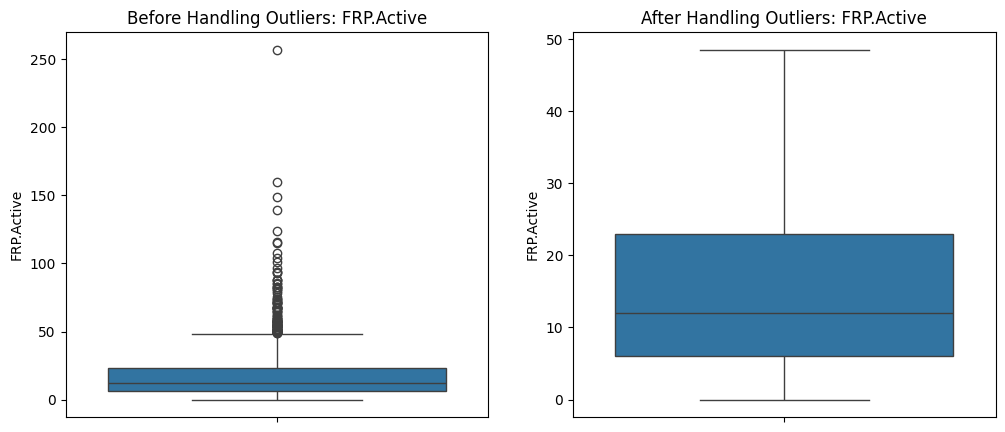

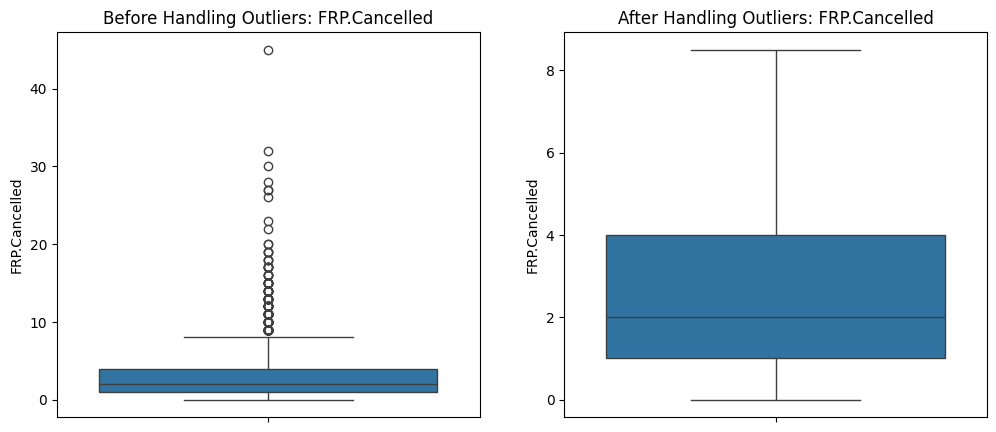

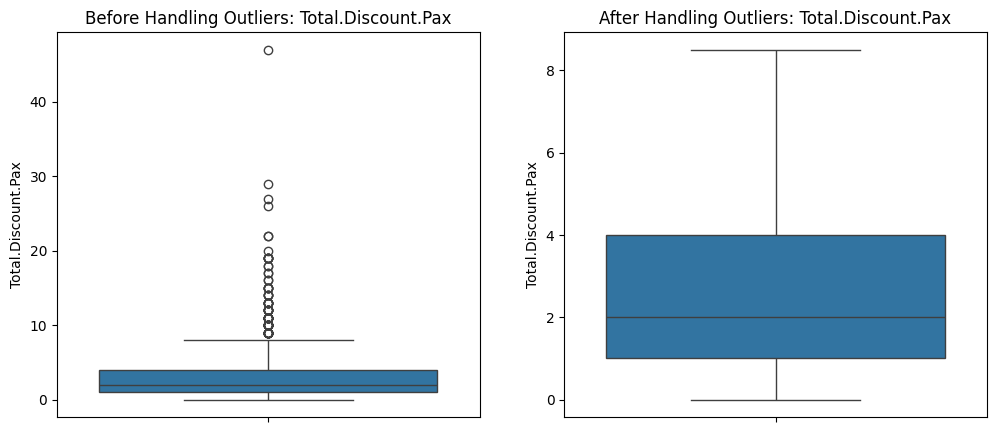

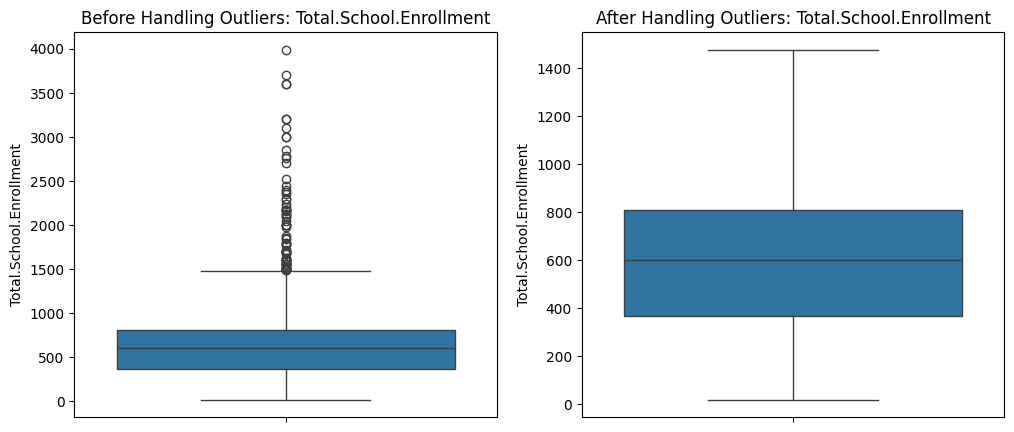

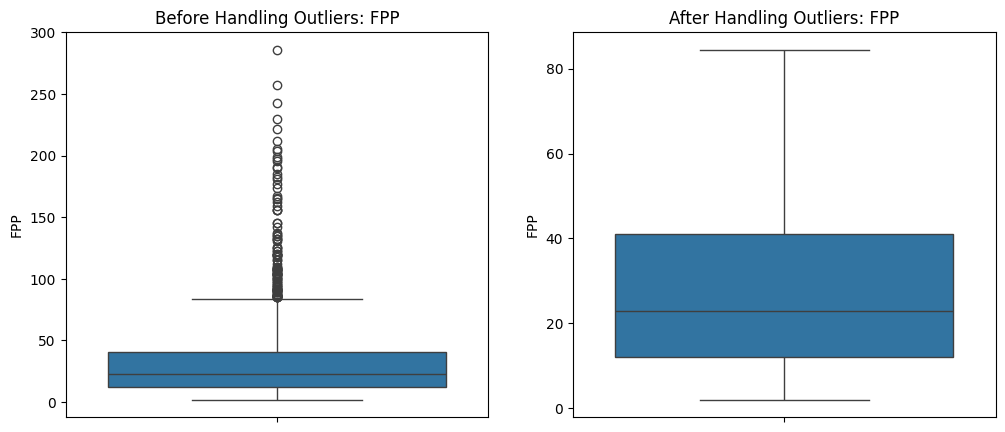

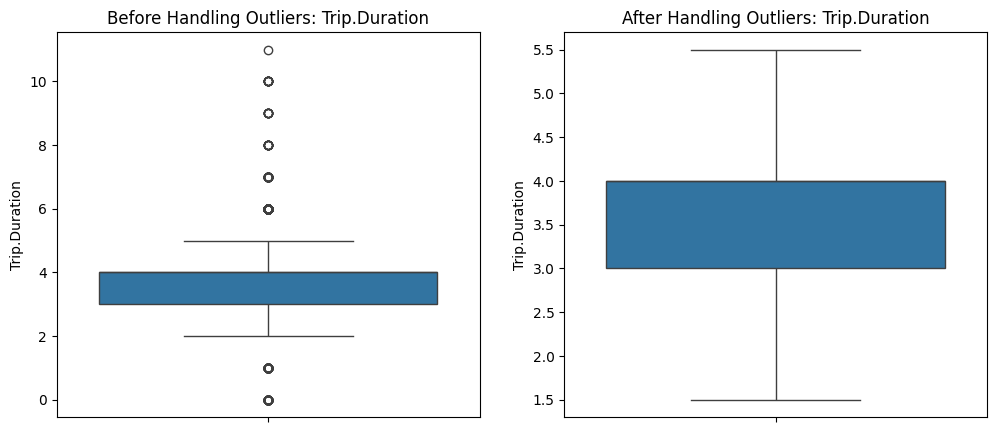

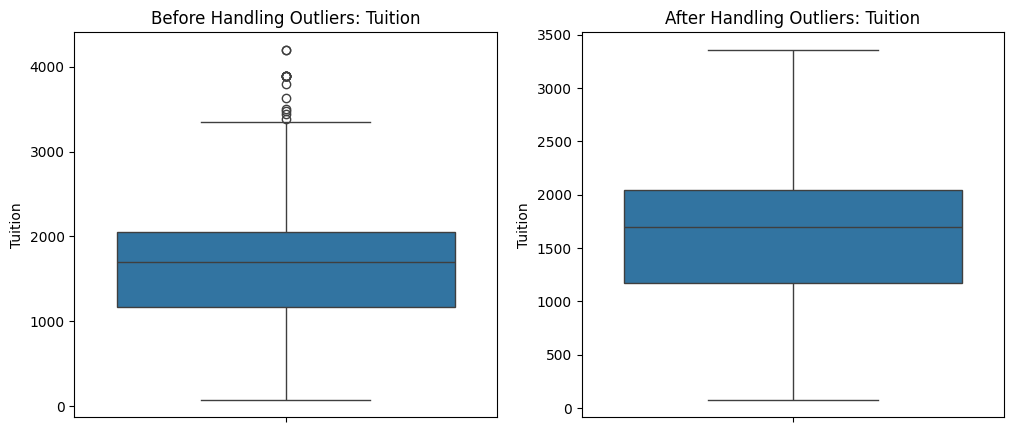

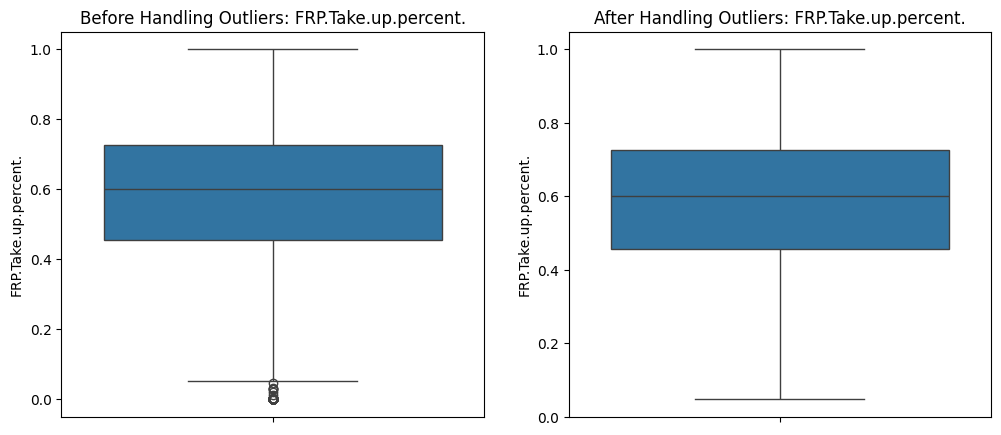

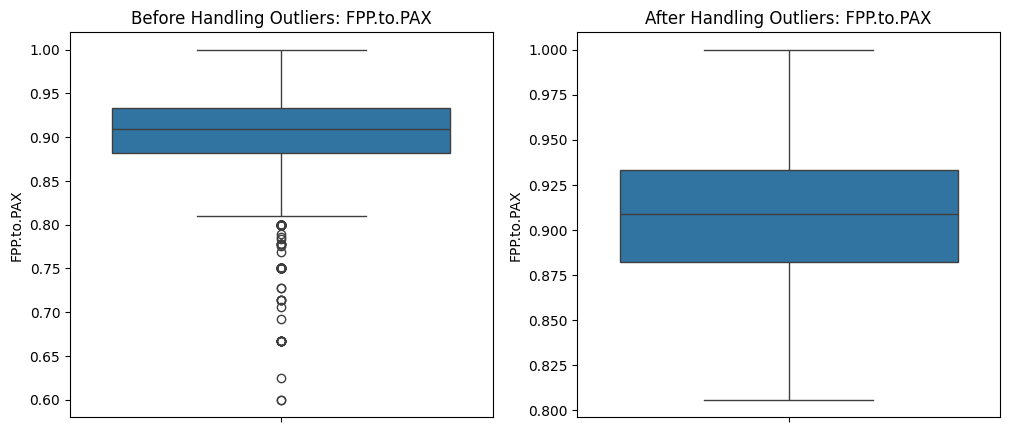

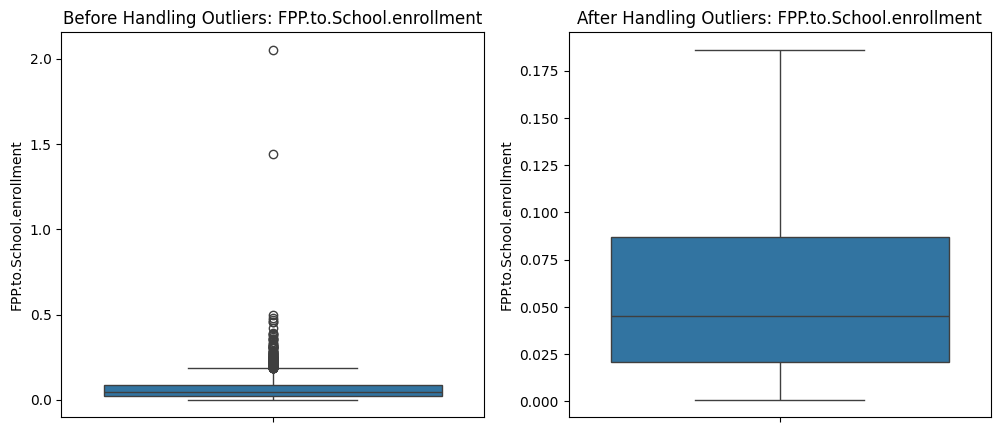

In [132]:
check_outliers_in = ['FRP.Active', 'FRP.Cancelled', 'Total.Discount.Pax', 'Total.School.Enrollment', 'FPP', 'Trip.Duration', 'Tuition', 'FRP.Take.up.percent.', 'FPP.to.PAX', 'FPP.to.School.enrollment']

comparison_df = data.copy() # for comparison only (before and after)
for feature in check_outliers_in: 
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75) #calculate quantiles for each variable
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR #calculate bounds for each variable

    outliers = data[
        (data[feature] < lower_bound) | (data[feature] > upper_bound) #data entries outside these bounds are outlier
    ]
    print(f'Feature {feature}: {len(outliers)} outliers detected.')
    data[feature] = np.clip(data[feature], lower_bound, upper_bound) 
    

for feature in check_outliers_in:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=comparison_df[feature])
    plt.title(f'Before Handling Outliers: {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(y=data[feature])
    plt.title(f'After Handling Outliers: {feature}')
    
    plt.show()

    

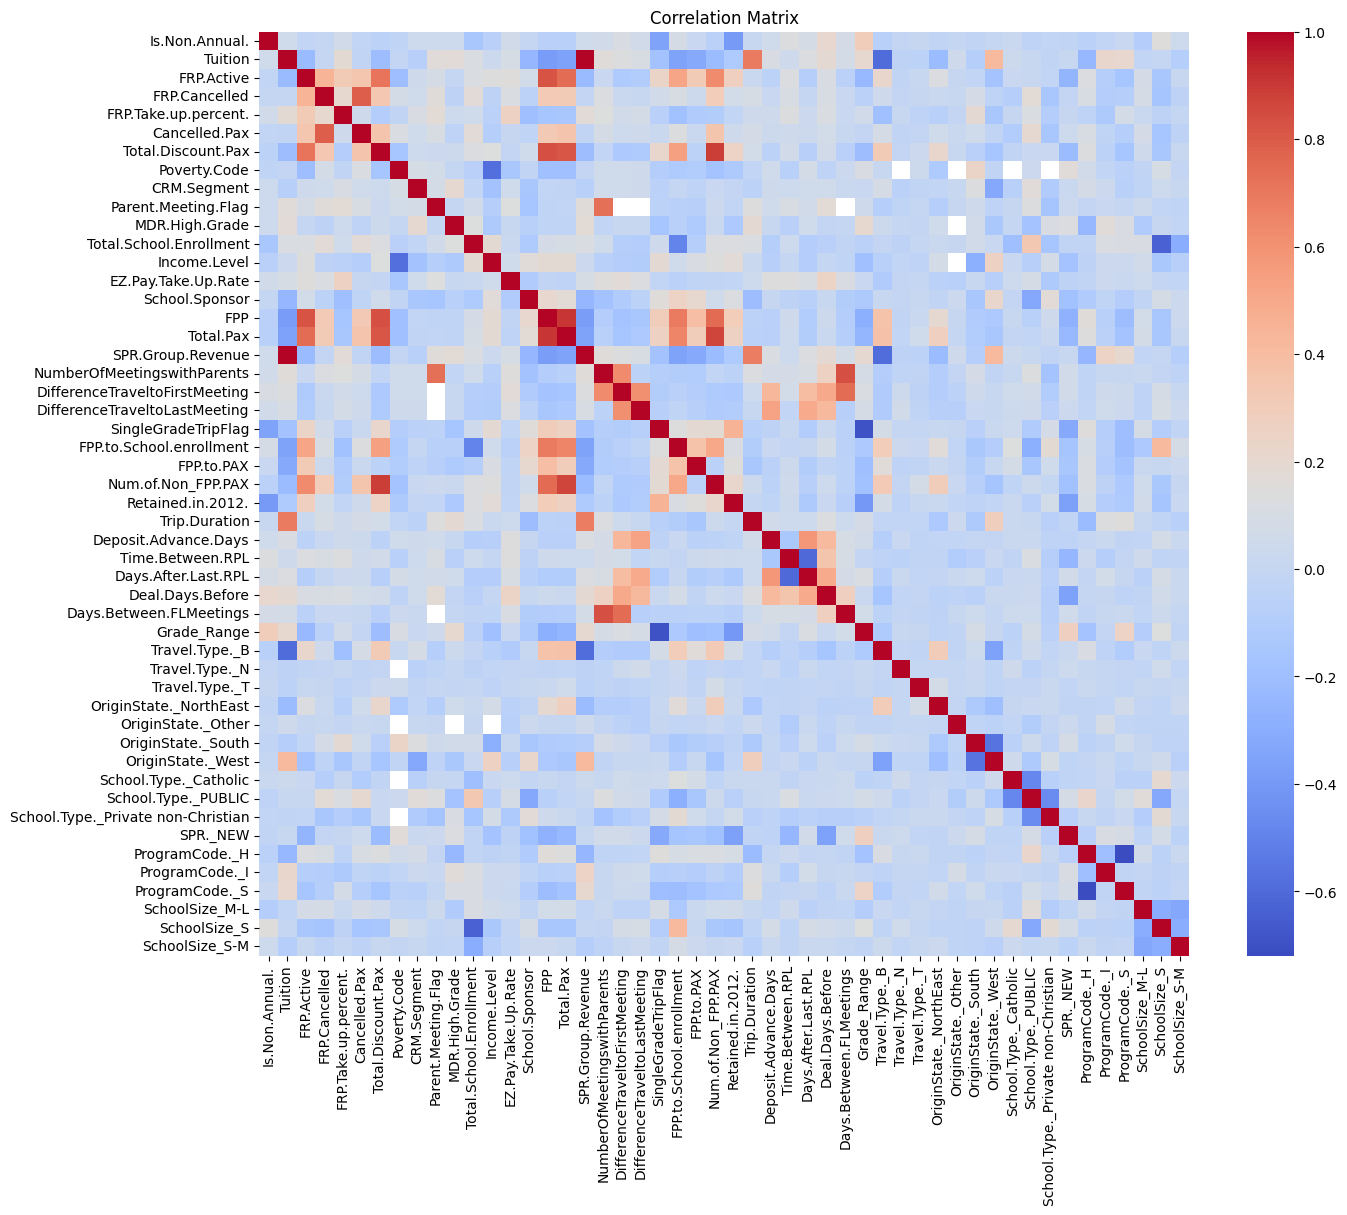

In [133]:
numerical_features = data.select_dtypes(include=['float64','int64','bool']).columns.tolist()

# Feature correlation visualization
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [134]:
threshold = 0.7

# Find pairs of highly correlated features
high_corr_pairs = []

features_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i,j]
        if abs(corr_value) > threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            col_pair = (col_i, col_j, corr_value)
            high_corr_pairs.append(col_pair)
            features_to_drop.update([col_i, col_j])

print(f"Highly correlated pairs (correlation > {threshold}):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}") # we drop these later for comparison


Highly correlated pairs (correlation > 0.7):
Cancelled.Pax and FRP.Cancelled: correlation = 0.79
Total.Discount.Pax and FRP.Active: correlation = 0.71
FPP and FRP.Active: correlation = 0.82
FPP and Total.Discount.Pax: correlation = 0.84
Total.Pax and FRP.Active: correlation = 0.74
Total.Pax and Total.Discount.Pax: correlation = 0.81
Total.Pax and FPP: correlation = 0.91
SPR.Group.Revenue and Tuition: correlation = 1.00
NumberOfMeetingswithParents and Parent.Meeting.Flag: correlation = 0.73
Num.of.Non_FPP.PAX and Total.Discount.Pax: correlation = 0.89
Num.of.Non_FPP.PAX and FPP: correlation = 0.75
Num.of.Non_FPP.PAX and Total.Pax: correlation = 0.87
Days.Between.FLMeetings and NumberOfMeetingswithParents: correlation = 0.84
Days.Between.FLMeetings and DifferenceTraveltoFirstMeeting: correlation = 0.74
ProgramCode._S and ProgramCode._H: correlation = -0.72


In [135]:

data['Poverty.Code'] = data.groupby('Region')['Poverty.Code'].transform(lambda x: x.fillna(x.mean()))
data['CRM.Segment'].fillna(data['CRM.Segment'].mode()[0], inplace=True)

grade_mapping = {'PK': 0, 'K': 0.5}

data['MDR.Low.Grade'] = data['MDR.Low.Grade'].replace(grade_mapping)
data['MDR.Low.Grade'] = data['MDR.Low.Grade'].astype(float)

data['MDR.Low.Grade'].fillna(data['MDR.Low.Grade'].median(), inplace=True)
data['MDR.High.Grade'].fillna(data['MDR.High.Grade'].median(), inplace=True)

data['Income.Level'] = data.groupby('Region')['Income.Level'].transform(lambda x: x.fillna(x.mean()))

data['DifferenceTraveltoFirstMeeting'].fillna(-1, inplace=True) # -1 indicates that no meeting was held
data['DifferenceTraveltoLastMeeting'].fillna(-1, inplace=True)

data.drop(columns=['Time.Between.RPL'], inplace=True)
data['Days.After.Last.RPL'].fillna(0, inplace=True)

data['Deal.Days.Before'].fillna(data['Deal.Days.Before'].median(), inplace=True)
data['Days.Between.FLMeetings'].fillna(data['Days.Between.FLMeetings'].median(), inplace=True)

print("Remaining missing values:")
print(data.isnull().sum())
print(data.info())





Remaining missing values:
Program.Code                          0
Is.Non.Annual.                        0
Tuition                               0
FRP.Active                            0
FRP.Cancelled                         0
FRP.Take.up.percent.                  0
Cancelled.Pax                         0
Total.Discount.Pax                    0
Poverty.Code                          0
Region                                0
CRM.Segment                           0
Parent.Meeting.Flag                   0
MDR.Low.Grade                         0
MDR.High.Grade                        0
Total.School.Enrollment               0
Income.Level                          0
EZ.Pay.Take.Up.Rate                   0
School.Sponsor                        0
SPR.Product.Type                      0
FPP                                   0
Total.Pax                             0
SPR.Group.Revenue                     0
NumberOfMeetingswithParents           0
DifferenceTraveltoFirstMeeting        0
DifferenceTrav

C:\Users\rsast\AppData\Local\Temp\ipykernel_500\3883681130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CRM.Segment'].fillna(data['CRM.Segment'].mode()[0], inplace=True)
C:\Users\rsast\AppData\Local\Temp\ipykernel_500\3883681130.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [136]:
print(data['Region'].unique())
print(data['Program.Code'].unique())
print(data['SPR.Product.Type'].unique())

product_type_mapping = {
    'CA History': 1,
    'East Coast': 2,
    'Science': 3,
    'Costa Rica': 4,
    'International': 5,
    'IL History':6
}

region_mapping = {
    'Other':0,
    'Pacific Northwest': 1,
    'Dallas': 2,
    'Houston': 3,
    'Southern California': 4,
    'Northern California': 5
}

grade_type_mapping = {
    'PK': 0,
    'K': 0.5,
    'Elementary': 1,
    'Middle': 2,
    'High': 3,
}

data['Region'] = data['Region'].map(region_mapping)

category_freq = data['Program.Code'].value_counts(normalize=True)
data['Program.Code'] = data['Program.Code'].map(category_freq)

data['SPR.Product.Type'] = data['SPR.Product.Type'].map(product_type_mapping)
data['SPR.Product.Type'].fillna(0, inplace=True)  # 0 for unknown types

data['SchoolGradeTypeLow'] = data['SchoolGradeTypeLow'].map(grade_type_mapping)
data['SchoolGradeTypeHigh'] = data['SchoolGradeTypeHigh'].map(grade_type_mapping)

data['GroupGradeTypeLow'] = data['GroupGradeTypeLow'].map(grade_type_mapping)
data['GroupGradeTypeHigh'] = data['GroupGradeTypeHigh'].map(grade_type_mapping)

data['GroupGradeTypeLow'].fillna(-1, inplace=True)
data['GroupGradeTypeHigh'].fillna(-1, inplace=True)

data['SchoolGradeTypeLow'].fillna(-1, inplace=True)
data['SchoolGradeTypeHigh'].fillna(-1, inplace=True)

data['SchoolGradeType'] = data['SchoolGradeTypeHigh'] - data['SchoolGradeTypeLow']
data['GroupGradeType'] = data['GroupGradeTypeHigh'] - data['GroupGradeTypeLow']

data.drop(columns=['DepartureMonth'], inplace=True)

print(data.info())


['Southern California' 'Other' 'Houston' 'Northern California' 'Dallas'
 'Pacific Northwest']
['HS' 'HC' 'HD' 'HN' 'SG' 'FN' 'CC' 'CD' 'HVP' 'SM' 'HG' 'HP' 'SK' 'HW'
 'SC' 'IC' 'HY' 'CVP' 'HF' 'ST' 'HZ' 'CN' 'HO' 'HX' 'HIS' 'SD' 'HH' 'IK']
['CA History' 'East Coast' 'Science' 'Costa Rica' 'International'
 'IL History']
<class 'pandas.core.frame.DataFrame'>
Index: 2389 entries, 1 to 2389
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Program.Code                        2389 non-null   float64
 1   Is.Non.Annual.                      2389 non-null   float64
 2   Tuition                             2389 non-null   float64
 3   FRP.Active                          2389 non-null   float64
 4   FRP.Cancelled                       2389 non-null   float64
 5   FRP.Take.up.percent.                2389 non-null   float64
 6   Cancelled.Pax                       2389 non-null   

C:\Users\rsast\AppData\Local\Temp\ipykernel_500\1050171013.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SPR.Product.Type'].fillna(0, inplace=True)  # 0 for unknown types
C:\Users\rsast\AppData\Local\Temp\ipykernel_500\1050171013.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Model Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       188
         1.0       0.82      0.89      0.85       290

    accuracy                           0.82       478
   macro avg       0.81      0.80      0.80       478
weighted avg       0.82      0.82      0.81       478

                               Feature  Coefficient
1                       Is.Non.Annual.    -0.855081
51                            SPR._NEW    -0.612306
31                 SingleGradeTripFlag     0.542182
53                      ProgramCode._I    -0.475936
3                           FRP.Active     0.454702
7                   Total.Discount.Pax     0.429630
20                           Total.Pax    -0.323108
17                      School.Sponsor     0.279550
50  School.Type._Private non-Christian     0.271429
47                   OriginState._West    -0.222788
52                      ProgramCode._H    -0.214551
11   

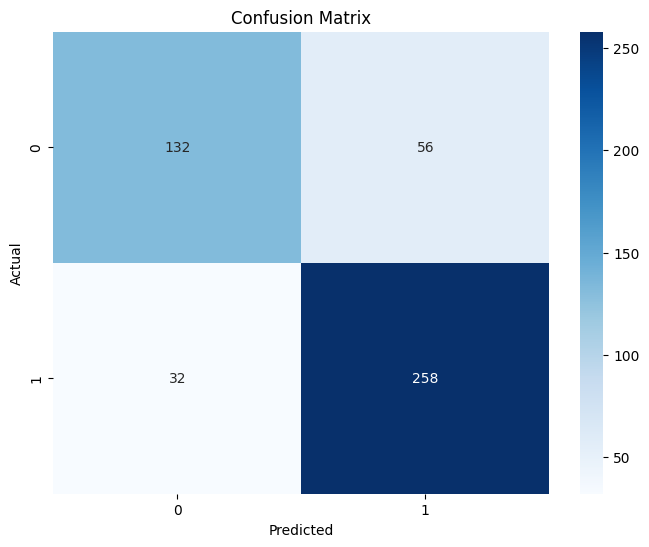

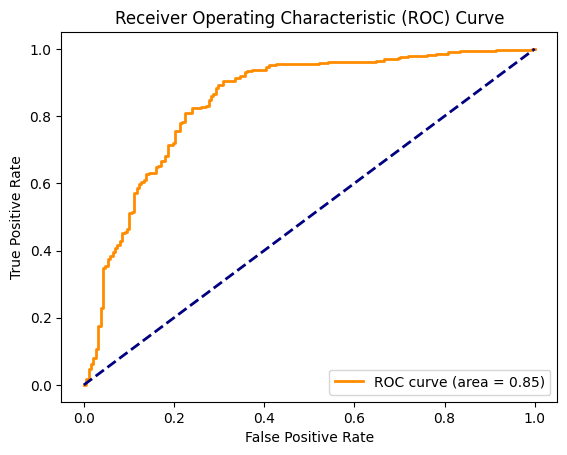

In [137]:
X = data.drop('Retained.in.2012.', axis=1)
y = data['Retained.in.2012.']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


feature_names = X.columns
coefficients = model.coef_[0]

# for interpretability
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)


print(coef_df[['Feature', 'Coefficient']].head(20))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import roc_curve, auc

# Generate probability estimates for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [138]:
corr_matrix = data.corr()

threshold = 0.7
label = 'Retained.in.2012.'

label_corr = corr_matrix[label]
poorly_corr_features = label_corr[abs(label_corr) < 0.10].index.to_list()

# Find pairs of highly and poorly correlated features
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(col_pair)

print(f'Poorly Correlated Features with Label (Correlation < 0.10)')
for feature in poorly_corr_features:
    print(f'{feature}: correlation = {label_corr[feature]:.2f}')







Poorly Correlated Features with Label (Correlation < 0.10)
Program.Code: correlation = 0.07
FRP.Cancelled: correlation = 0.07
FRP.Take.up.percent.: correlation = -0.02
Cancelled.Pax: correlation = 0.05
Region: correlation = 0.04
CRM.Segment: correlation = -0.01
Parent.Meeting.Flag: correlation = -0.02
MDR.Low.Grade: correlation = -0.00
EZ.Pay.Take.Up.Rate: correlation = -0.02
NumberOfMeetingswithParents: correlation = -0.05
DifferenceTraveltoFirstMeeting: correlation = -0.09
DifferenceTraveltoLastMeeting: correlation = -0.07
SchoolGradeTypeLow: correlation = -0.03
SchoolGradeTypeHigh: correlation = -0.09
GroupGradeTypeLow: correlation = -0.00
GroupGradeTypeHigh: correlation = -0.08
GroupGradeType: correlation = -0.06
Trip.Duration: correlation = -0.01
Deposit.Advance.Days: correlation = -0.03
Deal.Days.Before: correlation = 0.02
Days.Between.FLMeetings: correlation = -0.07
Travel.Type._B: correlation = 0.07
Travel.Type._N: correlation = -0.04
Travel.Type._T: correlation = 0.01
OriginSt

Num. of Features Dropped: 43
Features Dropped: {'GroupGradeType', 'SchoolSize_M-L', 'FRP.Cancelled', 'SchoolGradeTypeHigh', 'School.Type._Catholic', 'School.Type._PUBLIC', 'Program.Code', 'Days.Between.FLMeetings', 'FPP', 'Deposit.Advance.Days', 'SchoolGradeTypeLow', 'Tuition', 'SchoolSize_S-M', 'ProgramCode._S', 'FRP.Take.up.percent.', 'Travel.Type._T', 'GroupGradeTypeHigh', 'Parent.Meeting.Flag', 'DifferenceTraveltoFirstMeeting', 'Travel.Type._B', 'Deal.Days.Before', 'School.Type._Private non-Christian', 'OriginState._NorthEast', 'MDR.Low.Grade', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'OriginState._Other', 'FRP.Active', 'Num.of.Non_FPP.PAX', 'Travel.Type._N', 'Total.Pax', 'ProgramCode._H', 'CRM.Segment', 'Cancelled.Pax', 'DifferenceTraveltoLastMeeting', 'OriginState._South', 'OriginState._West', 'ProgramCode._I', 'Region', 'Trip.Duration', 'Total.Discount.Pax', 'EZ.Pay.Take.Up.Rate', 'GroupGradeTypeLow'}
Features in reduced dataset:15


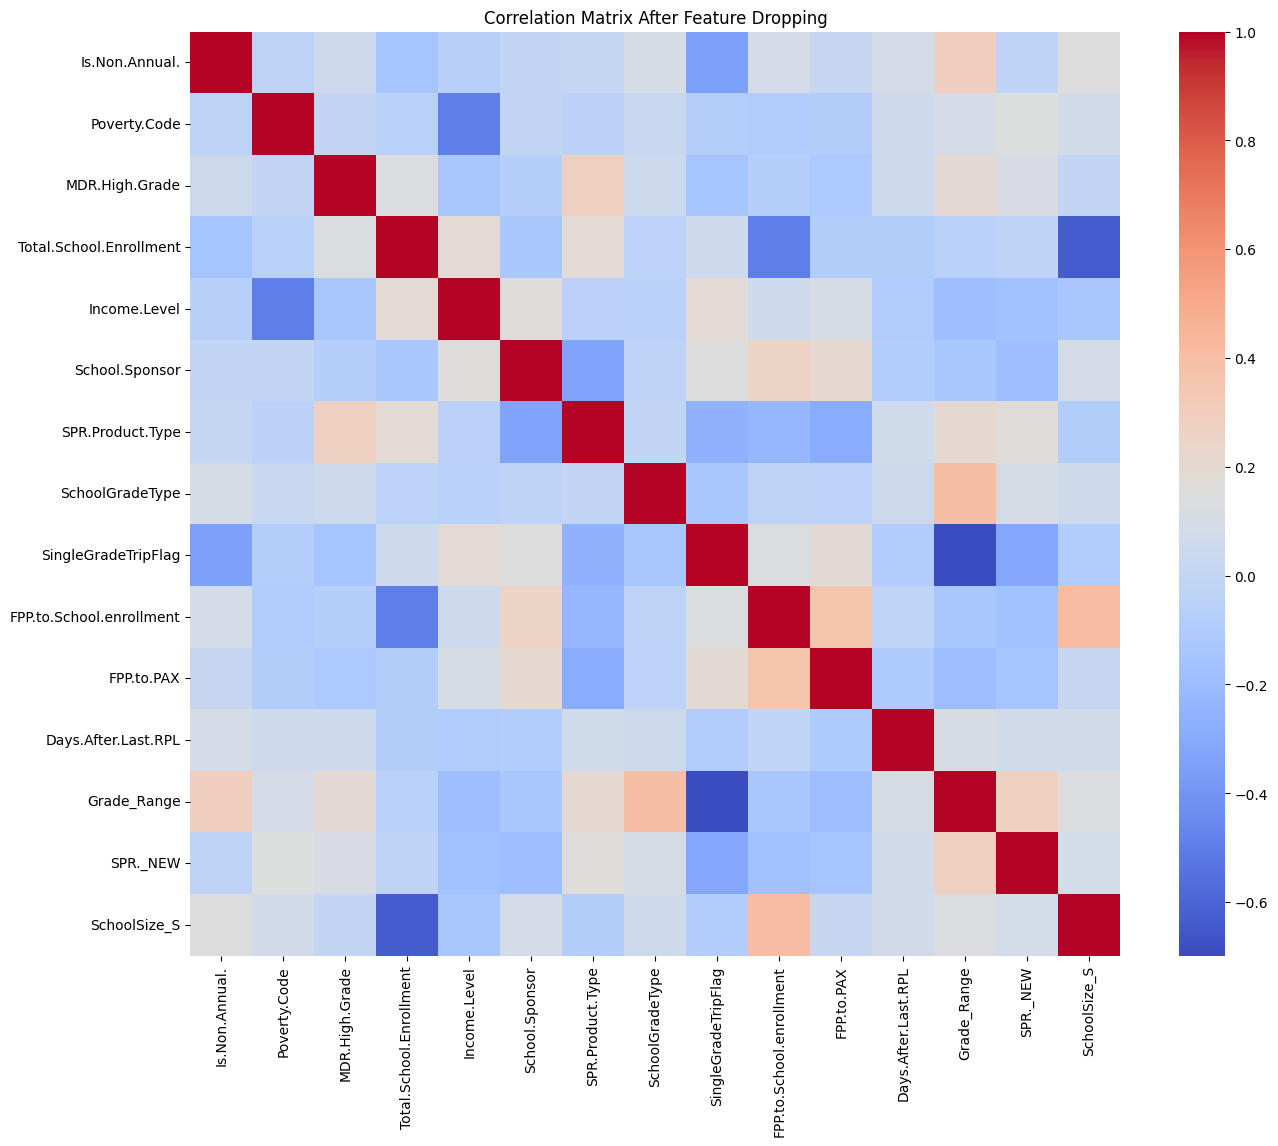

Model Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75       204
         1.0       0.80      0.86      0.83       274

    accuracy                           0.80       478
   macro avg       0.80      0.79      0.79       478
weighted avg       0.80      0.80      0.80       478

                     Feature  Coefficient
0             Is.Non.Annual.    -0.899558
13                  SPR._NEW    -0.662952
9   FPP.to.School.enrollment     0.470024
8        SingleGradeTripFlag     0.385510
12               Grade_Range    -0.291790
3    Total.School.Enrollment     0.286337
14              SchoolSize_S    -0.249151
1               Poverty.Code    -0.130678
2             MDR.High.Grade    -0.127905
11       Days.After.Last.RPL    -0.090682
5             School.Sponsor     0.079506
10                FPP.to.PAX     0.014299
6           SPR.Product.Type     0.006726
4               Income.Level     0.006204

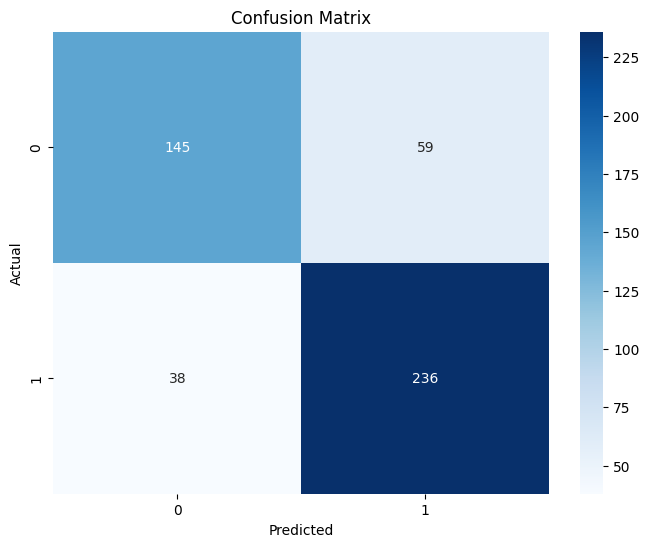

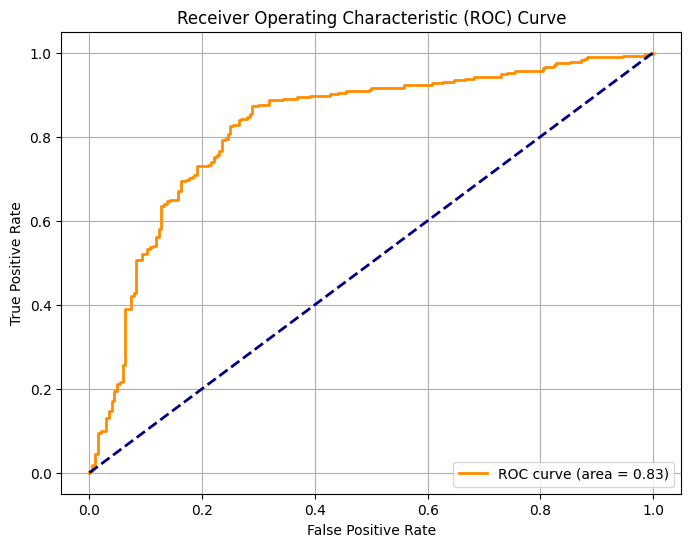

In [139]:
combined_features_to_drop = set(poorly_corr_features).union(features_to_drop)
X_reduced = X.drop(columns=combined_features_to_drop, inplace=False)

print(f'Num. of Features Dropped: {len(combined_features_to_drop)}')
print(f'Features Dropped: {combined_features_to_drop}')
print(f'Features in reduced dataset:{X_reduced.shape[1]}')

corr_matrix_2 = X_reduced.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix_2, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix After Feature Dropping')
plt.show()



X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

model = LogisticRegression()

model.fit(X_train_reduced_scaled, y_train)

y_pred = model.predict(X_test_reduced_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


feature_names = X_reduced.columns
coefficients = model.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

print(coef_df[['Feature', 'Coefficient']])

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming model and scaled test data are set up as per your code
# Generate probability estimates for the positive class
y_pred_proba = model.predict_proba(X_test_reduced_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()





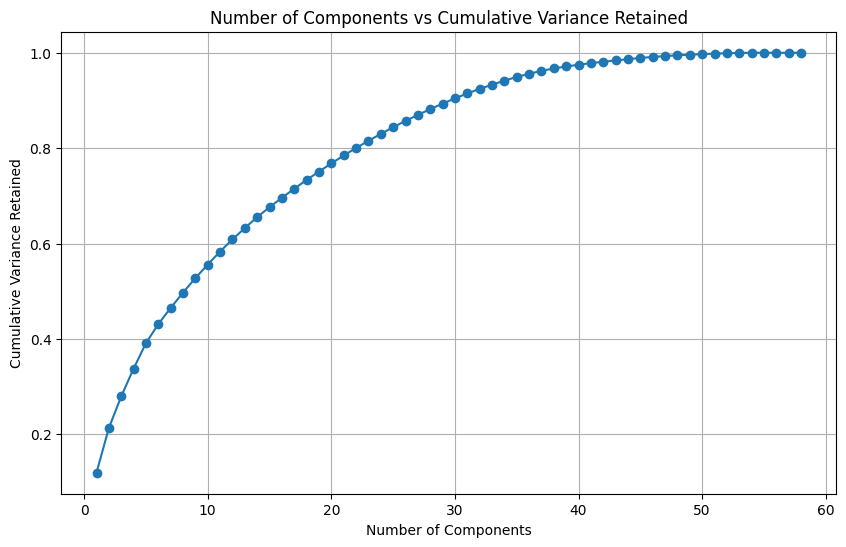

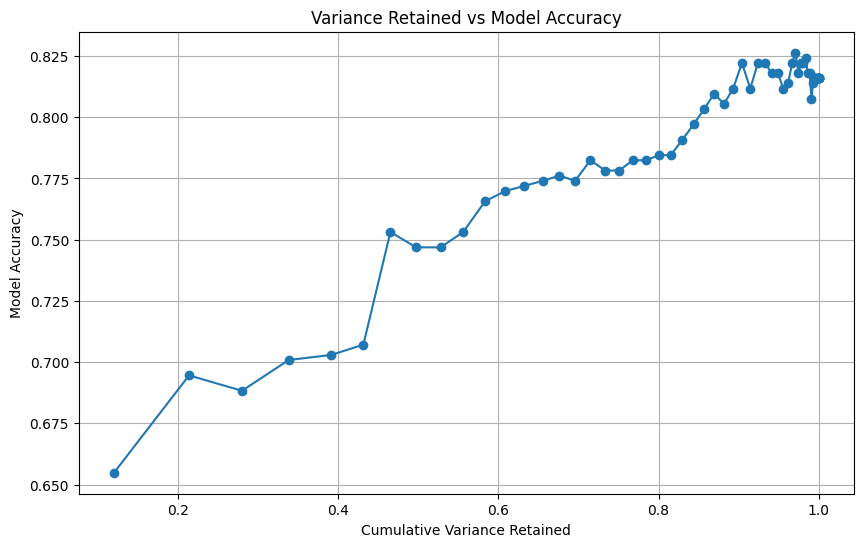

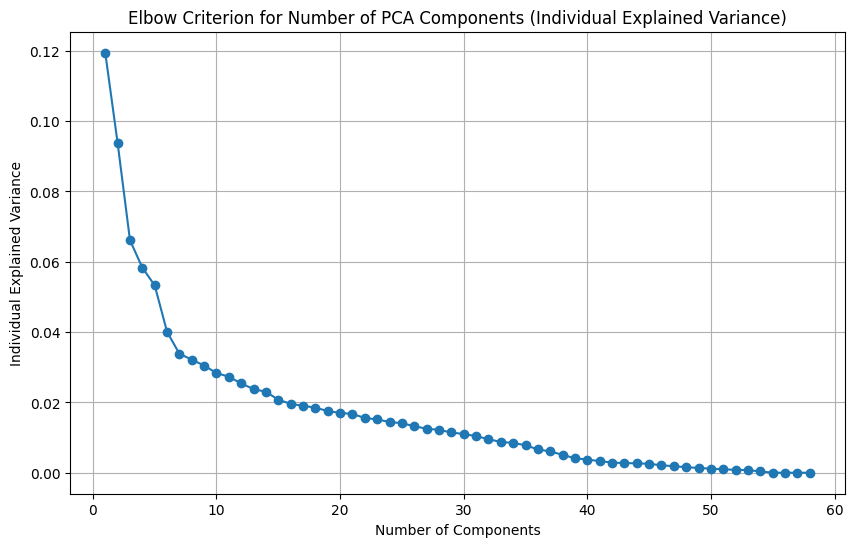

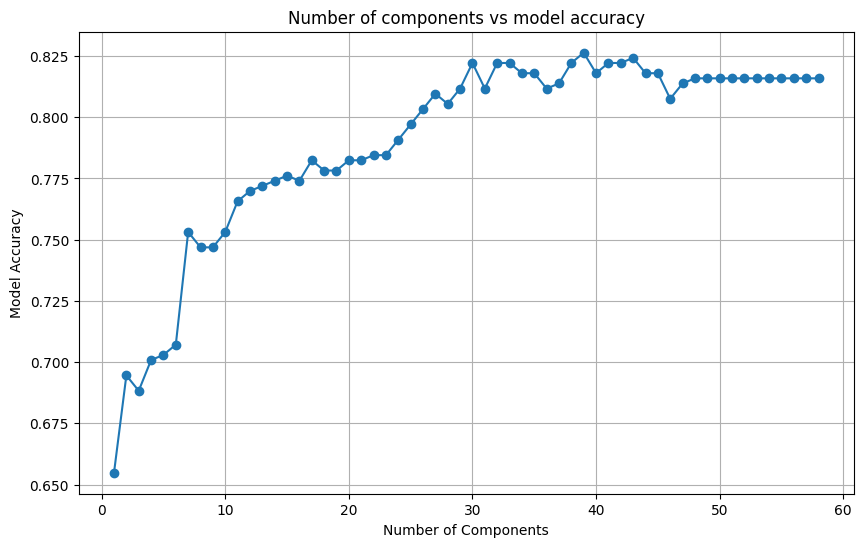

In [140]:
# Standardize the full feature matrix (assuming X contains the full dataset of features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store results for each component level
num_components = []
cumulative_variance_retained = []
model_accuracies = []

# Loop through different numbers of PCA components
for n_components in range(1, X_scaled.shape[1] + 1):
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Record the number of components and cumulative variance retained
    num_components.append(n_components)
    cumulative_variance_retained.append(np.sum(pca.explained_variance_ratio_))

    # Split the transformed data and train logistic regression
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Record model accuracy for this component level
    model_accuracies.append(accuracy)

# Plot Number of Components vs Cumulative Variance Retained to identify the ideal cutoff point
plt.figure(figsize=(10, 6))
plt.plot(num_components, cumulative_variance_retained, marker='o')
plt.title("Number of Components vs Cumulative Variance Retained")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Retained")
plt.grid(True)
plt.show()

# Plot Variance Retained vs Model Accuracy to see how model performance changes with variance retained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_retained, model_accuracies, marker='o')
plt.title("Variance Retained vs Model Accuracy")
plt.xlabel("Cumulative Variance Retained")
plt.ylabel("Model Accuracy")
plt.grid(True)
plt.show()

# To create an elbow criterion graph, we'll plot the individual explained variance for each component.
# This will allow us to observe the "elbow" point where the explained variance drops off, indicating a suitable cutoff.

# Apply PCA without limiting components to capture individual explained variances
pca_full = PCA()
pca_full.fit(X_scaled)
individual_explained_variances = pca_full.explained_variance_ratio_

# Plot the elbow criterion graph using individual explained variance per component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(individual_explained_variances) + 1), individual_explained_variances, marker='o')
plt.title("Elbow Criterion for Number of PCA Components (Individual Explained Variance)")
plt.xlabel("Number of Components")
plt.ylabel("Individual Explained Variance")
plt.grid(True)
plt.show()

# Plot the elbow criterion with accuracy on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(num_components, model_accuracies, marker='o')
plt.title("Number of components vs model accuracy")
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.grid(True)
plt.show()
